In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('CIFR(Ass2&3)/train_data.csv')
test=pd.read_csv('CIFR(Ass2&3)/test_data.csv')

In [75]:
x_train=train.drop(['label'],axis=1)
x_test=test.drop(['label'],axis=1)
y_train=train['label']
y_test=test['label']
x_train.shape

(50000, 3072)

In [87]:
x_train=x_train/255.0
x_test=x_test/255.0

x_train=np.reshape(x_train,(-1,32,32,3))

#x_train=np.reshape(x_train,(-1,32,32,3))
#y_train=np.reshape(y_train,(-1,32,32,3))

print(x_train.shape)

(50000, 32, 32, 3)


In [88]:
from sklearn.preprocessing import LabelBinarizer

LB= LabelBinarizer()
y_train=LB.fit_transform(y_train)

In [114]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10,activation='softmax'))

sgd = SGD(learning_rate=0.1,momentum=0.9,nesterov=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_14 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 12544)             0         
                                                                 
 dense_27 (Dense)            (None, 64)              

In [115]:
#x_train=np.asarray(x_train)

#x_train=tf.convert_to_tensor(x_train)
history = model.fit(x_train,y_train,epochs=11,batch_size=512)

Epoch 1/11
98/98 [==============================] - 23s 233ms/step - loss: 2.3032 - accuracy: 0.0996
Epoch 2/11
98/98 [==============================] - 24s 246ms/step - loss: 2.3031 - accuracy: 0.0998
Epoch 3/11
98/98 [==============================] - 23s 238ms/step - loss: 2.3032 - accuracy: 0.0995
Epoch 4/11
98/98 [==============================] - 23s 237ms/step - loss: 2.3030 - accuracy: 0.0993
Epoch 5/11
98/98 [==============================] - 24s 243ms/step - loss: 2.3030 - accuracy: 0.0982
Epoch 6/11
98/98 [==============================] - 24s 248ms/step - loss: 2.3030 - accuracy: 0.0985
Epoch 7/11
98/98 [==============================] - 26s 261ms/step - loss: 2.3031 - accuracy: 0.0975
Epoch 8/11
98/98 [==============================] - 26s 267ms/step - loss: 2.3031 - accuracy: 0.0992
Epoch 9/11
98/98 [==============================] - 26s 270ms/step - loss: 2.3031 - accuracy: 0.0992
Epoch 10/11
98/98 [==============================] - 26s 270ms/step - loss: 2.3031 - accura

In [91]:
x_test=np.reshape(x_test,(-1,32,32,3))
y_test=LB.fit_transform(y_test)

In [92]:
pred = model.predict(x_test)


313/313 [==============================] - 3s 10ms/step


In [94]:
loss,accuracy= model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.3029 - accuracy: 0.1000


In [104]:
print(f"Loss     = {loss:.4f}")
print(f"Accuracy = {accuracy*100:.2f}%")

Loss     = 2.3029
Accuracy = 10.00%


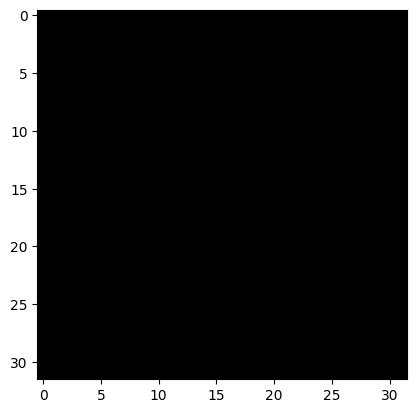

In [108]:
idx = 1
import matplotlib.pyplot as plt

plt.imshow(x_test[idx])

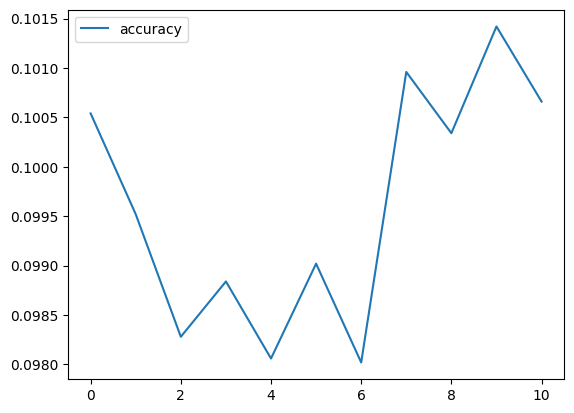

In [109]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.show()

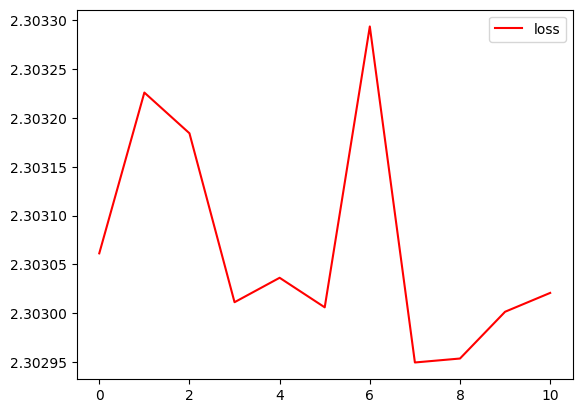

In [111]:
plt.plot(history.history['loss'],label='loss',color='red')
plt.legend()
plt.show()